In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

870


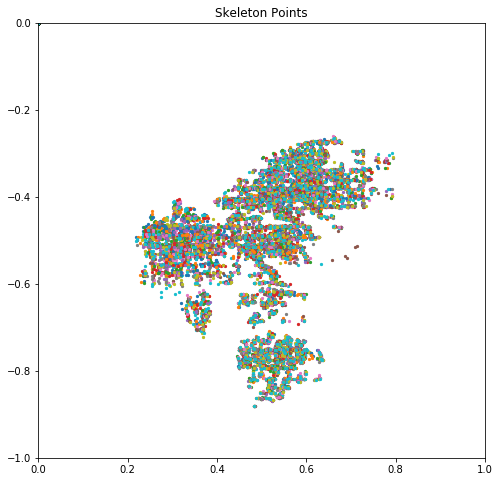

In [2]:
BASE_DIR = "D:/openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended/openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer/Arabesque"

#run through each dancer folder and plot the coordinates
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                #print(file_path)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                sc = ax.scatter(x,y, s=5)
                count+=1
plotCoordinates()
print(count)


['Dancer1', 'Dancer10', 'Dancer11', 'Dancer12', 'Dancer13', 'Dancer14', 'Dancer15', 'Dancer16', 'Dancer17', 'Dancer18', 'Dancer19', 'Dancer2', 'Dancer20', 'Dancer21', 'Dancer22', 'Dancer23', 'Dancer25', 'Dancer26', 'Dancer27', 'Dancer28', 'Dancer29', 'Dancer3', 'Dancer30', 'Dancer4', 'Dancer5', 'Dancer6', 'Dancer7', 'Dancer8', 'Dancer9']
DancerNum: 0
[]
DancerNum: 1
[]
DancerNum: 2
[]
DancerNum: 3
[]
DancerNum: 4
[]
DancerNum: 5
[]
DancerNum: 6
[]
DancerNum: 7
[]
DancerNum: 8
[]
DancerNum: 9
[]
DancerNum: 10
[]
DancerNum: 11
[]
DancerNum: 12
[]
DancerNum: 13
[]
DancerNum: 14
[]
DancerNum: 15
[]
DancerNum: 16
[]
DancerNum: 17
[]
DancerNum: 18
[]
DancerNum: 19
[]
DancerNum: 20
[]
DancerNum: 21
[]
DancerNum: 22
[]
DancerNum: 23
[]
DancerNum: 24
[]
DancerNum: 25
[]
DancerNum: 26
[]
DancerNum: 27
[]
DancerNum: 28
[]
DancerNum: 29
30


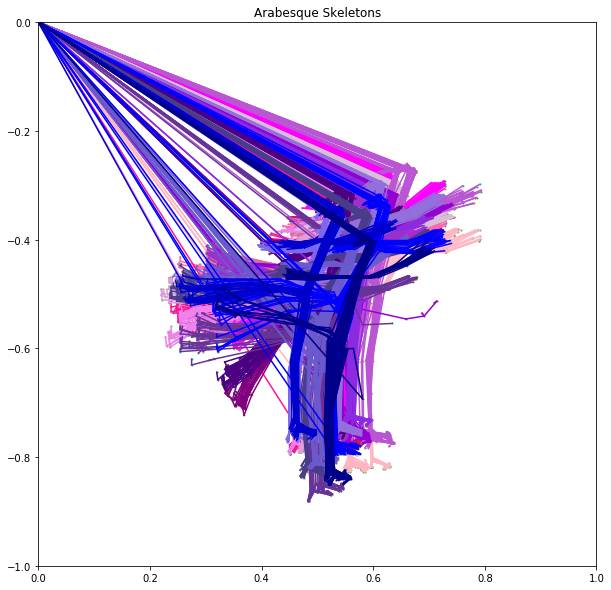

In [13]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']

allXList =[]
allYList = []
dancerNum = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Arabesque Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    for subdir, dirs, files in os.walk(BASE_DIR):
        print(dirs)
        print("DancerNum:", dancerNum)
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                allXList.append(x)
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                allYList.append(y)
                sc = ax.scatter(x,y, s=1)
                for bone in bones:
                    #Remove the 0,0 xy coordinates plotting
                    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                        #print("zero values for joint: ",x.index(x[bone[0]]))
                        #print("zero values for joint: ",x.index(x[bone[1]]))
                        continue
                    #ax.plot([x_values],[y_values])
                    #if(dancerNum != 17):
                    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        dancerNum+=1               
    print(dancerNum)
plotSkeletons()



In [4]:
np.save('allXList.npy', allXList)
np.save('allYList.npy', allYList)

In [5]:
xloaded = np.load('allXList.npy')
print(xloaded)
print(len(xloaded))
yloaded = np.load('allYList.npy')
print(yloaded)
print(len(yloaded))

[[0.629939 0.607424 0.591083 ... 0.580965 0.576767 0.548273]
 [0.629978 0.611405 0.595074 ... 0.580921 0.576751 0.550301]
 [0.62986  0.611461 0.595085 ... 0.582942 0.576795 0.550244]
 ...
 [0.6054   0.58088  0.558367 ... 0.556376 0.548147 0.52364 ]
 [0.599218 0.578817 0.550219 ... 0.558366 0.548169 0.523654]
 [0.597205 0.578814 0.550253 ... 0.317327 0.31939  0.352086]]
870
[[-0.352578 -0.417869 -0.407139 ... -0.813033 -0.818384 -0.818391]
 [-0.352583 -0.420686 -0.415202 ... -0.81562  -0.818441 -0.818526]
 [-0.347098 -0.420663 -0.412498 ... -0.815621 -0.818455 -0.818448]
 ...
 [-0.404346 -0.467083 -0.467046 ... -0.84027  -0.845778 -0.851149]
 [-0.404201 -0.466982 -0.466856 ... -0.840318 -0.848424 -0.851147]
 [-0.404264 -0.467029 -0.466901 ... -0.524205 -0.518709 -0.543309]]
870


In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
print(sumXList)
print(sumYList)

#Get the average: sum/count - count calculated in cell 2 of this notebook
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
print(avgXList)
print(avgYList)

[514.8613429999992, 495.3640159999994, 478.9906830000003, 442.10991499999994, 405.31830800000006, 512.7803010000002, 556.9292440000002, 600.2270660000001, 452.38138799999973, 437.9427219999997, 383.20153400000015, 327.93393100000054, 459.9391709999997, 440.8484490000008, 436.80840700000005, 508.54950800000006, 4.382634, 493.04206400000027, 0, 458.48023599999965, 444.55959800000005, 424.10054399999984, 315.3303399999994, 311.94410000000016, 321.54880600000007]
[-291.6038759999997, -347.36777200000006, -342.9742830000002, -353.1784140000001, -357.06195499999995, -351.35684799999996, -341.4995140000001, -320.08030400000035, -448.82627300000007, -433.4649829999996, -465.3431979999998, -500.0025690000005, -457.0509709999993, -551.6936529999995, -645.9693040000005, -286.03761299999996, -2.295823, -294.7265860000003, 0, -651.4246390000008, -634.1993650000006, -649.2178139999992, -504.2213689999997, -498.899225, -502.3771780000002]
[0.5917946471264359, 0.5693839264367809, 0.5505640034482762, 0

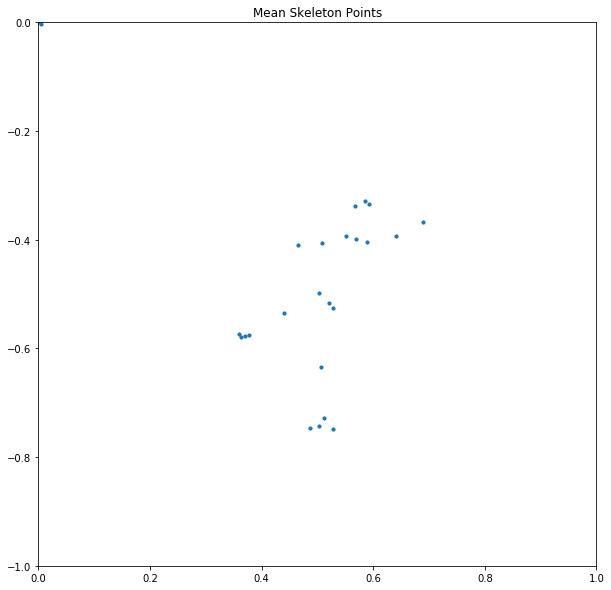

In [7]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
            
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics



In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY) 

Standard Deviations of X values: [0.03630198741281868, 0.0353156037835625, 0.034807007749819006, 0.035139641152800806, 0.03645576457366006, 0.03620510920838181, 0.03851151362989117, 0.04113243339580595, 0.046696908155924546, 0.07604018174661242, 0.08170821002273358, 0.10664133341567548, 0.05325835485906682, 0.05351602490358661, 0.06545350608430779, 0.035944939719083, 0.05603139639368901, 0.03548606964485905, 0.0, 0.08734552607246361, 0.1185540584108481, 0.0889866758520791, 0.12865642110302739, 0.12680221828625604, 0.1084318143498441]
Standard Deviations of Y values: [0.03499750904196989, 0.03315899080057559, 0.03300931058479514, 0.03216987727478609, 0.03310617793516475, 0.03213796238706431, 0.032447743611299124, 0.03503167484192168, 0.04204241838599347, 0.07311195962662141, 0.10194988712073823, 0.14422073713984146, 0.049239438396213454, 0.06242437130849328, 0.09112803587502086, 0.03499682988620984, 0.029448557267570143, 0.03564934492913011, 0.0, 0.11184401109063137, 0.15983769402018788

In [10]:
#plot standard deviation coordinates?
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('ArabesqueStdDevX.npy', standardDeviationX)
np.save('ArabesqueStdDevY.npy', standardDeviationY)
np.save('ArabesqueMeanX.npy', avgXList)
np.save('ArabesqueMeanY.npy', avgYList)